In [1]:
import tensorflow_datasets as tfds

import librosa
import librosa.display

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Tensorflow datasets: {tfds.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Tensorflow datasets: 4.2.0
Librosa: 0.8.0
Numpy: 1.19.5
Matplotlib: 3.4.1


In [3]:
import pump

data_dir = "../dataset"

(train, test), info = tfds.load("pump", split=["train", "test"], data_dir=data_dir, with_info=True)

In [4]:
def print_plot(audio_sample, color):
    y = list(audio_sample)[0]["audio"].numpy() / 2**15
    sr = 16000

    fig, ax = plt.subplots(1, 4, figsize=(24, 2))

    librosa.display.waveplot(y, sr=sr, ax=ax[0], color=color)
    ax[0].set(title=f"Waveplot")

    S = np.abs(librosa.stft(y))
    D = librosa.amplitude_to_db(S, ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[1])
    ax[1].set(title=f"Linear-frequency power spectrogram")
    fig.colorbar(img, ax=ax[1], format='%+2.0f dB')

    img = librosa.display.specshow(D, y_axis='log', sr=sr, x_axis='time', ax=ax[2])
    ax[2].set(title='Log-frequency power spectrogram')
    fig.colorbar(img, ax=ax[2], format='%+2.0f dB')  

    M = librosa.feature.melspectrogram(S=S**2)
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax[3])
    ax[3].set(title=f"Mel spectrogram")
    fig.colorbar(img, ax=ax[3], format='%+2.0f dB')
    # plt.show()

audio audio_id  label  \
0  [458, 500, 451, 321, 221, 202, 131, 202, 201, ...  b'0027'      0   
1  [-299, -471, -377, -326, -378, -609, -711, -59...  b'0012'      0   
2  [95, 11, -299, -269, -579, -509, -619, -423, 4...  b'0019'      1   

  machine_id     split  
0      b'00'  b'train'  
1      b'00'   b'test'  
2      b'00'   b'test'

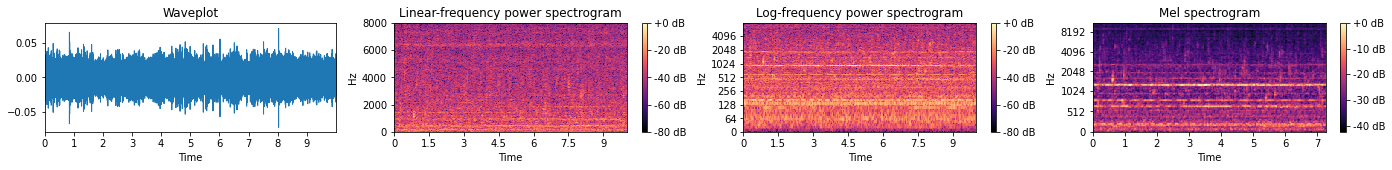

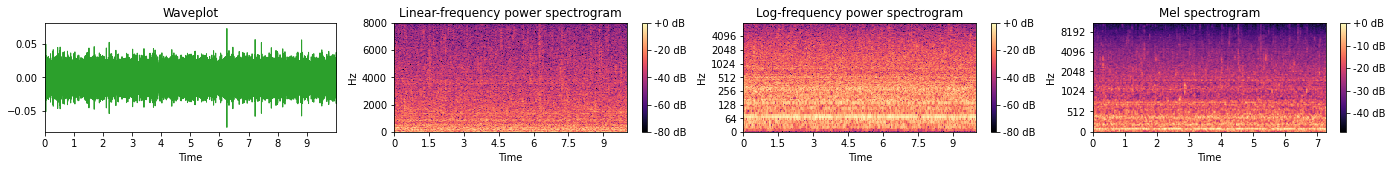

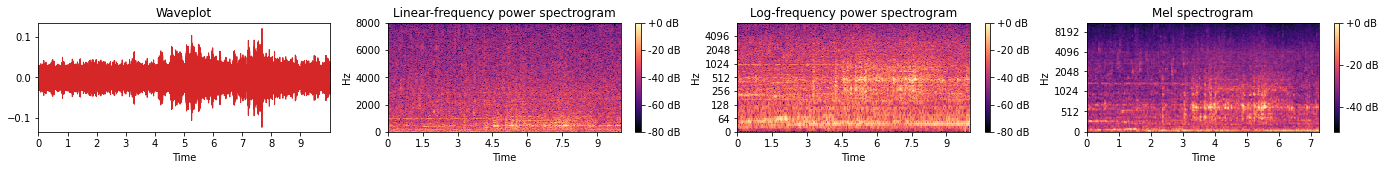

In [5]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0)

machine_id = "00"
idx = 0

for split in ["train", "test"]:
    for label in [0,1]:
        if split == "train" and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["machine_id"] == machine_id) & (x["split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 